In [5]:
from xfoil import XFoil
from xfoil.model import Airfoil
from xfoil.test import naca0012

from scipy import interpolate
from scipy.interpolate import interp1d

import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg

from pathlib import Path
import numpy as np
import os
import gc
import sys

from config import *
from lib.utils import *
from lib.preprocess_modules import *

## Part 1

### Create pickle files with airfoils

Convert airfoils .dat files to pickle files with following structure:

#### Dict {}:

    'x_raw' - source x coordinate from .dat file.
    'y_raw' - source y coordinate from .dat file.
    'X_raw' - array of n_foil_params * n_points_Re * n_points_alfa size , with NaN for XFoil failed points.
    'X'     - array of n_foil_params * n_points_Re * n_points_alfa size , with interpolated XFoil failed points.
    'y'     - Xfoil.Airfoil object with classes 'coords','n_coords','x','y'. Used for generation of tagret array.
    'd'     - foil aileron thickness.
    'S'     - foil root thickness.
    
Save .pkl files to **foils_pkl_path** folder.

!!! Use only foils, specified in 'Foils xxx-xxx thickness.pkl' file

In [6]:
use_list = load_pkl(Path(foils_dat_path, 'Foils 4-10 thickness.pkl'))

In [9]:
run_foils = 2000

# get list of alfas and alfa step
alfa_step, alfas = get_alfa_step(alfa_min, alfa_max, n_points_alfa)

# set list of Re's
Re = np.linspace(re_min, re_max, n_points_Re).astype(int)

print("Alfas:", alfas)
print("Re's:", Re)

foils_counter = 0

for fname in os.listdir(foils_dat_path):
    
    if fname in use_list:
    
        foils_counter += 1

        # check whether the foil analyzed already
        if fname.replace(".dat", ".pkl") in os.listdir(foils_pkl_path):
            print(foils_counter, 'Work on', fname, "     --> Foil's pkl file already exists, skipping.")
            continue
        else:
            print(foils_counter, 'Work on', fname)
        
        # get foil array
        foil_output = create_foil_array_from_dat_file(fname, Re, alfas, alfa_min, alfa_max, alfa_step)        
        
        # save file
        pkl_name = fname.replace(".dat", ".pkl")
        save_pkl(foil_output, Path(foils_pkl_path, pkl_name))        
        print("     --> File %s saved." % pkl_name)
        
        # exit
        if foils_counter > run_foils: raise Exception("Required number of processed foils exceeded:", run_foils)        

Alfas: [-2.0999999  -1.78437495 -1.46874988 -1.15312481 -0.83749986 -0.52187485
 -0.20624983  0.10937518  0.42500019  0.7406252   1.05625021  1.37187529
  1.68750024  2.00312519  2.31875014  2.63437533  2.95000029  3.26562524
  3.58125043  3.89687538  4.2125001   4.52812529  4.84375048  5.15937519
  5.47500038  5.79062557  6.10625029  6.42187548  6.73750019  7.05312538
  7.36875057  7.68437529]
Re's: [ 40000  50666  61333  72000  82666  93333 104000 114666 125333 136000
 146666 157333 168000 178666 189333 200000]
1 Work on 2032c.dat      --> Foil's pkl file already exists, skipping.
2 Work on a18.dat
     --> 0 NaNs corrected.
     --> File a18.pkl saved.
3 Work on a18sm.dat
     --> 128 NaNs corrected.
     --> File a18sm.pkl saved.
4 Work on a63a108c.dat
     --> 0 NaNs corrected.
     --> File a63a108c.pkl saved.
5 Work on ag03.dat      --> Foil's pkl file already exists, skipping.
6 Work on ag04.dat      --> Foil's pkl file already exists, skipping.
7 Work on ag08.dat      --> Foil

133 Work on fx76100.dat      --> Foil's pkl file already exists, skipping.
134 Work on fx77080.dat      --> Foil's pkl file already exists, skipping.
135 Work on fx79l100.dat      --> Foil's pkl file already exists, skipping.
136 Work on fx80080.dat      --> Foil's pkl file already exists, skipping.
137 Work on fx84w097.dat      --> Foil's pkl file already exists, skipping.
138 Work on fxm2.dat      --> Foil's pkl file already exists, skipping.
139 Work on giiib.dat      --> Foil's pkl file already exists, skipping.
140 Work on giiic.dat      --> Foil's pkl file already exists, skipping.
141 Work on giiid.dat      --> Foil's pkl file already exists, skipping.
142 Work on giiie.dat      --> Foil's pkl file already exists, skipping.
143 Work on giiif.dat      --> Foil's pkl file already exists, skipping.
144 Work on giiig.dat      --> Foil's pkl file already exists, skipping.
145 Work on giiih.dat      --> Foil's pkl file already exists, skipping.
146 Work on giiii.dat      --> Foil's pk

274 Work on goe428.dat      --> Foil's pkl file already exists, skipping.
275 Work on goe432.dat      --> Foil's pkl file already exists, skipping.
276 Work on goe437.dat      --> Foil's pkl file already exists, skipping.
277 Work on goe439.dat      --> Foil's pkl file already exists, skipping.
278 Work on goe442.dat      --> Foil's pkl file already exists, skipping.
279 Work on goe443.dat      --> Foil's pkl file already exists, skipping.
280 Work on goe444.dat      --> Foil's pkl file already exists, skipping.
281 Work on goe445.dat      --> Foil's pkl file already exists, skipping.
282 Work on goe450.dat      --> Foil's pkl file already exists, skipping.
283 Work on goe451.dat      --> Foil's pkl file already exists, skipping.
284 Work on goe456.dat      --> Foil's pkl file already exists, skipping.
285 Work on goe457.dat      --> Foil's pkl file already exists, skipping.
286 Work on goe458.dat      --> Foil's pkl file already exists, skipping.
287 Work on goe464.dat      --> Foil's

428 Work on mh45.dat      --> Foil's pkl file already exists, skipping.
429 Work on mh46.dat      --> Foil's pkl file already exists, skipping.
430 Work on mh49.dat      --> Foil's pkl file already exists, skipping.
431 Work on mh60.dat      --> Foil's pkl file already exists, skipping.
432 Work on mh61.dat      --> Foil's pkl file already exists, skipping.
433 Work on mh62.dat      --> Foil's pkl file already exists, skipping.
434 Work on mh64.dat      --> Foil's pkl file already exists, skipping.
435 Work on n0009sm.dat      --> Foil's pkl file already exists, skipping.
436 Work on n11h9.dat      --> Foil's pkl file already exists, skipping.
437 Work on n12.dat      --> Foil's pkl file already exists, skipping.
438 Work on n5h10.dat      --> Foil's pkl file already exists, skipping.
439 Work on n63010a.dat      --> Foil's pkl file already exists, skipping.
440 Work on n63210.dat      --> Foil's pkl file already exists, skipping.
441 Work on n64008a.dat      --> Foil's pkl file alread

572 Work on sc20406.dat      --> Foil's pkl file already exists, skipping.
573 Work on sc20410.dat      --> Foil's pkl file already exists, skipping.
574 Work on sc20606.dat      --> Foil's pkl file already exists, skipping.
575 Work on sc20610.dat      --> Foil's pkl file already exists, skipping.
576 Work on sc20706.dat      --> Foil's pkl file already exists, skipping.
577 Work on sc20710.dat      --> Foil's pkl file already exists, skipping.
578 Work on sc21006.dat      --> Foil's pkl file already exists, skipping.
579 Work on sc21010.dat      --> Foil's pkl file already exists, skipping.
580 Work on sc2110.dat      --> Foil's pkl file already exists, skipping.
581 Work on sd2030.dat      --> Foil's pkl file already exists, skipping.
582 Work on sd2083.dat      --> Foil's pkl file already exists, skipping.
583 Work on sd5060.dat      --> Foil's pkl file already exists, skipping.
584 Work on sd6060.dat      --> Foil's pkl file already exists, skipping.
585 Work on sd6080.dat      --

Foil name: ['ag35.pkl'] 
Root thickness: 0.09, flap thickness: 0.05
Show curve: Cd


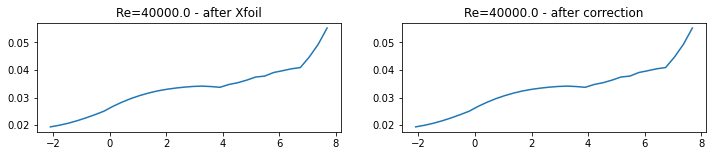

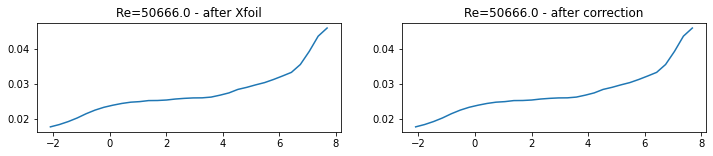

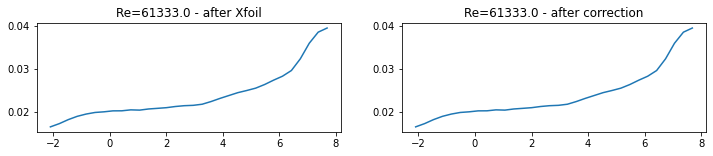

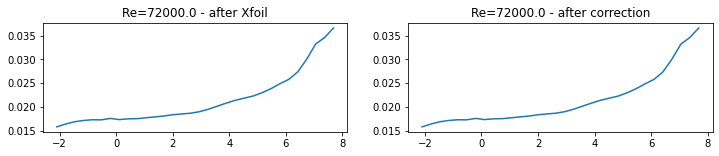

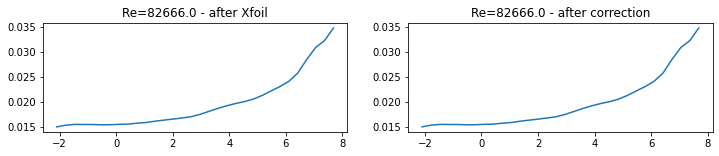

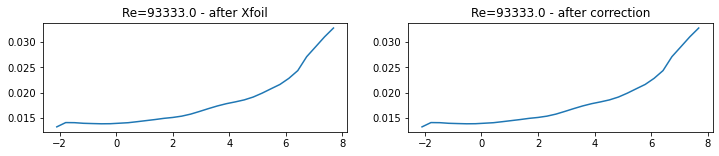

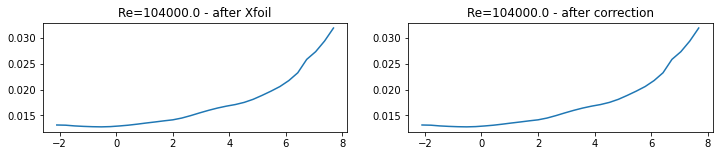

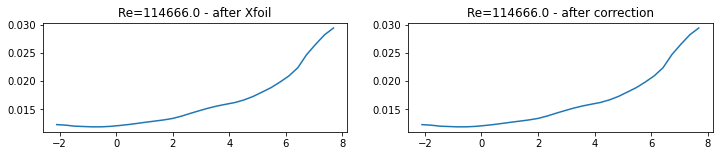

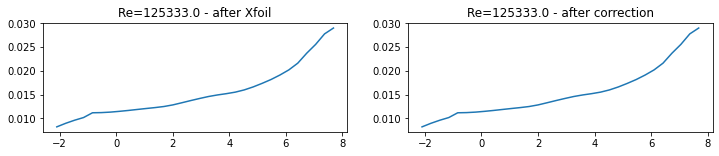

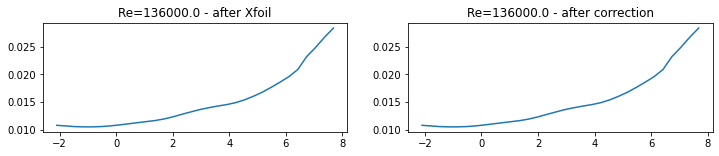

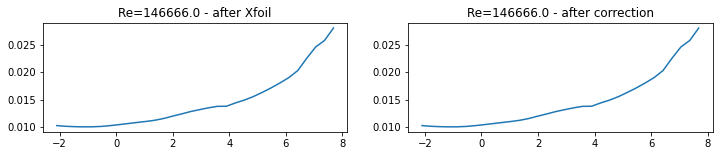

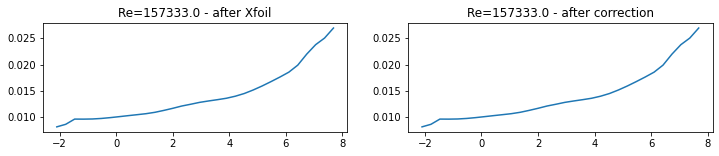

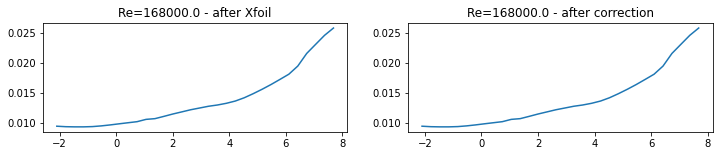

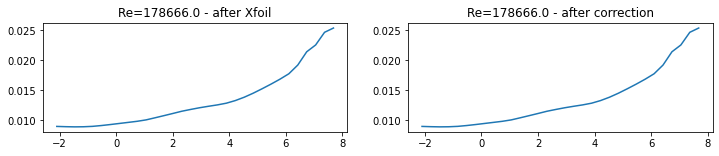

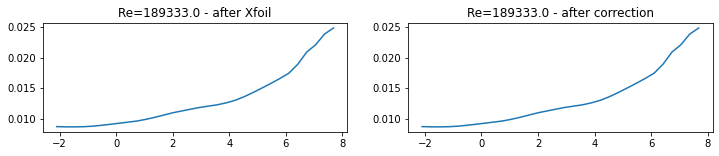

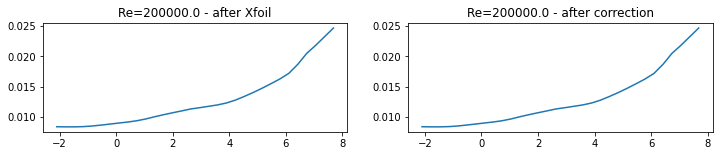

In [10]:
show_foil_info(Path(foils_pkl_path, "ag35.pkl"), 'Cd')

## Part 2

### Generate target bitmaps

1. Create output folders as per **bitmap_outputs**
2. For each airfoil:
    - opens pickle file with airfoil data; 
    - reads raw foil x-y coordinates (as specified in initial .dat file);
    - interpolates it with **n_points_interpolate_for_bmp points**;
    - plots it to buffer with figsize as per **bitmap_outputs**;
    - saves as jpg file at **foils_bmp_path** of minimal resolution;
    - converts to boolean and saves as pickle file at respective resolution folder **foils_bmp_path**.

In [3]:
# find minimum required resolution and create output folders
output_folders=[]
min_resolution = 32768*32768
for res in bitmap_outputs:
    x = res[0]; y = res[1]
    output_folders.append(str(x)+'x'+str(y))
    if x*y<min_resolution: min_resolution = x*y 
print('Output jpegs resolution: %i*%i.' % (x, y))

for folder in output_folders:
    folder_path = Path(foils_bmp_path, folder)
    if not os.path.exists(folder_path): 
        try:
            os.mkdir(folder_path)
        except OSError:
            print ("Creation of the directory %s failed" % folder_path)

Output jpegs resolution: 512*512.


In [4]:
# check is there any data already exists
existing_foils = []
for fname in os.listdir(foils_pkl_path):
    exist=True
    for folder in output_folders:
        if fname not in os.listdir(Path(foils_bmp_path, folder)): exist=False
    if fname.replace('.pkl', '.jpg') not in os.listdir(Path(foils_bmp_path)): exist=False
    if exist: existing_foils.append(fname)

In [5]:
for fname in os.listdir(foils_pkl_path):
    
    if '.pkl' in fname and fname not in existing_foils:   
        
        print('Work on %s ...' % fname)
        
        for bitmap_pixels_y, bitmap_pixels_x in bitmap_outputs:            
        
            # read foil
            foil = load_pkl(Path(foils_pkl_path, fname))
            fig_x = bitmap_pixels_x/zoom_coef
            fig_y = bitmap_pixels_y/zoom_coef
            
            # interpolate
            x, y = interpolate_airfoil(foil['x_raw'], foil['y_raw'], n_points_interpolate_for_bmp)

            # plot
            fig = plt.figure(figsize=(fig_x,fig_y),  frameon=False)
            canvas = FigureCanvasAgg(fig)
            ax = fig.add_axes([0.,0.,1.,1.])
            ax.fill(x, y, 'black')
            ax.axis('equal');
            ax.axis('off');
            s, (width, height) = canvas.print_to_buffer()
            
            # copy plot to array
            foil_bmp = np.array(np.frombuffer(s, np.uint8).reshape((height, width, 4))[:,:,0])

            if bitmap_pixels_x*bitmap_pixels_y == min_resolution:
            # save bmp file here
                plt.savefig(Path(foils_bmp_path, fname.replace('.pkl', '.jpg')))
                
            plt.close()
            
            # convert to bool
            foil_bmp[foil_bmp==0] = 1
            foil_bmp[foil_bmp==255] = 0
            foil_bmp = foil_bmp.astype('bool') 
            
            # save pkl array here            
            save_pkl(foil_bmp, Path(foils_bmp_path, str(bitmap_pixels_y)+'x'+str(bitmap_pixels_x), fname))
            
            del foil_bmp, canvas, fig, foil            
            sys.stdout.flush()
            gc.collect()
            del gc.garbage[:]
        gc.collect()
    gc.collect()
print('All done!')

Work on 2032c.pkl ...
Work on a18.pkl ...
Work on a18sm.pkl ...
Work on a63a108c.pkl ...
Work on ag03.pkl ...
Work on ag04.pkl ...
Work on ag08.pkl ...
Work on ag09.pkl ...
Work on ag10.pkl ...
Work on ag11.pkl ...
Work on ag12.pkl ...
Work on ag13.pkl ...
Work on ag14.pkl ...
Work on ag16.pkl ...
Work on ag17.pkl ...
Work on ag18.pkl ...
Work on ag19.pkl ...
Work on ag24.pkl ...
Work on ag25.pkl ...
Work on ag26.pkl ...
Work on ag27.pkl ...
Work on ag35.pkl ...
Work on ag36.pkl ...
Work on ag37.pkl ...
Work on ag38.pkl ...
Work on ag44ct02r.pkl ...
Work on ag455ct02r.pkl ...
Work on ag45c03.pkl ...
Work on ag45ct02r.pkl ...
Work on ag46c03.pkl ...
Work on ag46ct02r.pkl ...
Work on ag47c03.pkl ...
Work on ag47ct02r.pkl ...
Work on ah21-7.pkl ...
Work on ah21-9.pkl ...
Work on ah6407.pkl ...
Work on ah7476.pkl ...
Work on ah79100a.pkl ...
Work on ah79100b.pkl ...
Work on ah79100c.pkl ...
Work on ames01.pkl ...
Work on ames02.pkl ...
Work on ames03.pkl ...
Work on aquilasm.pkl ...
Work o

Work on hq258.pkl ...
Work on hq259.pkl ...
Work on hq2590sm.pkl ...
Work on hq259b.pkl ...
Work on hq3010.pkl ...
Work on hq308.pkl ...
Work on hq309.pkl ...
Work on hq3510.pkl ...
Work on hq358.pkl ...
Work on hq359.pkl ...
Work on ht05.pkl ...
Work on ht08.pkl ...
Work on ht12.pkl ...
Work on ht22.pkl ...
Work on ht23.pkl ...
Work on isa571.pkl ...
Work on isa960.pkl ...
Work on isa961.pkl ...
Work on isa962.pkl ...
Work on k2.pkl ...
Work on kc135d.pkl ...
Work on lg10sc.pkl ...
Work on lrn1007.pkl ...
Work on lwk79100.pkl ...
Work on lwk80080.pkl ...
Work on lwk80100.pkl ...
Work on m1.pkl ...
Work on m10.pkl ...
Work on m11.pkl ...
Work on m13.pkl ...
Work on m14.pkl ...
Work on m16.pkl ...
Work on m17.pkl ...
Work on m19.pkl ...
Work on m2.pkl ...
Work on m20.pkl ...
Work on m22.pkl ...
Work on m23.pkl ...
Work on m25.pkl ...
Work on m26.pkl ...
Work on m4.pkl ...
Work on m5.pkl ...
Work on m665.pkl ...
Work on m685.pkl ...
Work on m7.pkl ...
Work on m9.pkl ...
Work on ma409.pkl

In [6]:
# check pickle arrays shapes match to folders names
for folder in output_folders:
    for fname in os.listdir(Path(foils_bmp_path, folder)):
        fl = load_pkl(Path(foils_bmp_path, folder, fname))
        if str(fl.shape[0])+'x'+str(fl.shape[1])!=folder:
            print(Path(foils_bmp_path, folder, fname),'-', fl.shape)